# Binary Classification

This example demonstrates various Binary Classifier methods. We will use the Titanic dataset.

In [20]:
from vertica_ml_python.learn.datasets import load_titanic
titanic = load_titanic()
print(titanic)

,fare,sex,body,pclass,age,name,cabin,parch,survived,boat,ticket,embarked,home.dest,sibsp
0,151.55000,female,None,1,2.000,"Allison, Miss. Helen Loraine",C22 C26,2,0,None,113781,S,"Montreal, PQ / Chesterville, ON",1
1,151.55000,male,135,1,30.000,"Allison, Mr. Hudson Joshua Creighton",C22 C26,2,0,None,113781,S,"Montreal, PQ / Chesterville, ON",1
2,151.55000,female,None,1,25.000,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",C22 C26,2,0,None,113781,S,"Montreal, PQ / Chesterville, ON",1
3,0.00000,male,None,1,39.000,"Andrews, Mr. Thomas Jr",A36,0,0,None,112050,S,"Belfast, NI",0
4,49.50420,male,22,1,71.000,"Artagaveytia, Mr. Ramon",None,0,0,None,PC 17609,C,"Montevideo, Uruguay",0
,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: titanic, Number of rows: 1234, Number of columns: 14


Let's create a Logistic Regression to predict the survival of the Titanic passengers. We will use the age and the fare as predictors.

In [7]:
from vertica_ml_python.learn.linear_model import LogisticRegression
model = LogisticRegression("public.LR_titanic")
model.fit("public.titanic", ["age", "fare"], "survived")



details
predictor|coefficient|std_err |z_value |p_value 
---------+-----------+--------+--------+--------
Intercept| -0.09135  | 0.15559|-0.58709| 0.55714
   age   | -0.01439  | 0.00475|-3.02599| 0.00248
  fare   |  0.01546  | 0.00212| 7.29445| 0.00000


regularization
type| lambda 
----+--------
 l2 | 1.00000


call_string
logistic_reg('public.LR_titanic', 'public.titanic', '"survived"', '"age", "fare"'
USING PARAMETERS optimizer='cgd', epsilon=0.0001, max_iterations=100, regularization='l2', lambda=1, alpha=0)

Additional Info
       Name       |Value
------------------+-----
 iteration_count  |  5  
rejected_row_count| 238 
accepted_row_count| 996 

By fitting the model, new model's attributes will be created. We will use these new attributes with various methods.

In [8]:
model.X

['"age"', '"fare"']

In [9]:
model.y

'"survived"'

In [10]:
model.input_relation

'public.titanic'

In [11]:
model.test_relation

'public.titanic'

In our case, we did not write the test relation when fitting the model. The model will then consider the train relation as test. These attributes will be used when invoking the different model abstractions. For example, let's compute the accuracy of the model.

In [12]:
model.score(method = "accuracy")

0.6837349397590361

The 'score' method is using the attribute 'y' and the model prediction in the 'test_relation' to compute the accuracy. You can change these at anytime to deploy the models on different columns. The model could also have other useful attributes. In this case, the 'coef' attribute provides us with useful information.

In [13]:
model.coef

,predictor,coefficient,std_err,z_value,p_value
0,Intercept,-0.0913487583375232,0.155594583418985,-0.587094719689177,0.557140093691283
1,age,-0.0143850235204285,0.00475381848744904,-3.02599343210255,0.00247817685818187
2,fare,0.0154603623341147,0.00211946971061135,7.29444835031647,2.99885239324488e-13


<object>

Many abstractions can help you by drawing model evaluation curves like a PRC, ROC or Lift Chart

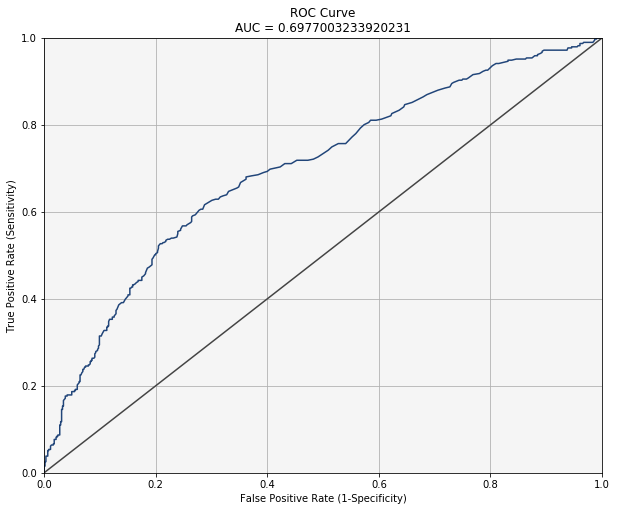

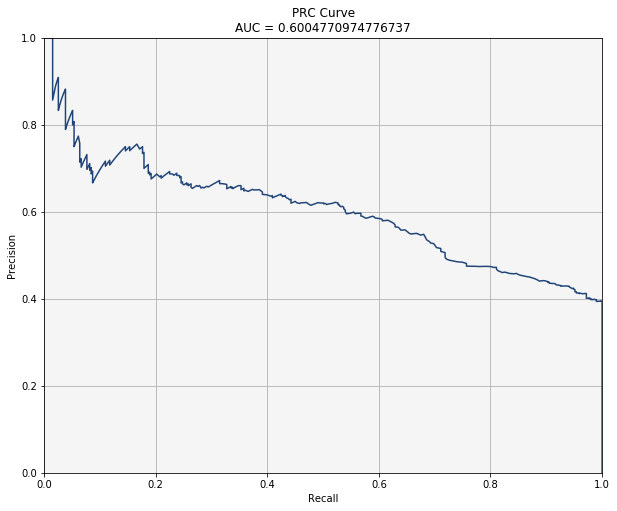

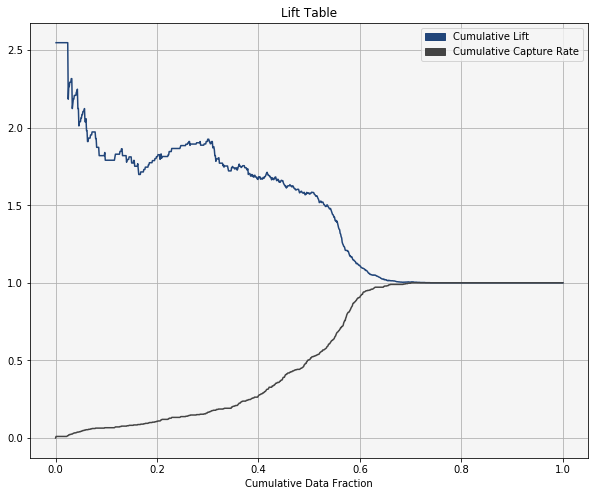

In [14]:
model.roc_curve()
model.prc_curve()
model.lift_chart()

Let's look at the generated SQL code.

In [16]:
print(model.deploySQL())

PREDICT_LOGISTIC_REG("age", "fare" USING PARAMETERS model_name = 'public.LR_titanic', type = 'probability', match_by_pos = 'true')


The best way to evaluate your model is with the classification report.

In [17]:
model.classification_report()

,value
auc,0.6974762740166146
prc_auc,0.6003540469187277
accuracy,0.6837349397590361
log_loss,0.281741003041208
precision,0.5038363171355499
recall,0.6194968553459119
f1_score,0.6633411948044721
mcc,0.318256543966939
informedness,0.33336116213057254
markedness,0.3038363171355498


<object>

You can also add the prediction to your vDataFrame (The method 'predict' is only possible for built-in algorithms, the method 'to_vdf' is a way to replace it when the implementation is not possible). Don't forget to change the 'X' attribute if the column names differ.

In [21]:
model.predict(titanic, name = "pred_survived")

,fare,sex,body,pclass,age,name,cabin,parch,survived,boat,ticket,embarked,home.dest,sibsp,pred_survived
0,151.55000,female,None,1,2.000,"Allison, Miss. Helen Loraine",C22 C26,2,0,None,113781,S,"Montreal, PQ / Chesterville, ON",1,0.902287093955018
1,151.55000,male,135,1,30.000,"Allison, Mr. Hudson Joshua Creighton",C22 C26,2,0,None,113781,S,"Montreal, PQ / Chesterville, ON",1,0.860580339225997
2,151.55000,female,None,1,25.000,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",C22 C26,2,0,None,113781,S,"Montreal, PQ / Chesterville, ON",1,0.868988361039809
3,0.00000,male,None,1,39.000,"Andrews, Mr. Thomas Jr",A36,0,0,None,112050,S,"Belfast, NI",0,0.342456861096143
4,49.50420,male,22,1,71.000,"Artagaveytia, Mr. Ramon",None,0,0,None,PC 17609,C,"Montevideo, Uruguay",0,0.414029417624538
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


<object>  Name: titanic, Number of rows: 1234, Number of columns: 15

The vDataFrame has also a method 'score' to do model evaluation.

In [24]:
titanic.score("survived", "pred_survived", method = "auc")

0.6974762740166146

Examine your prediction.

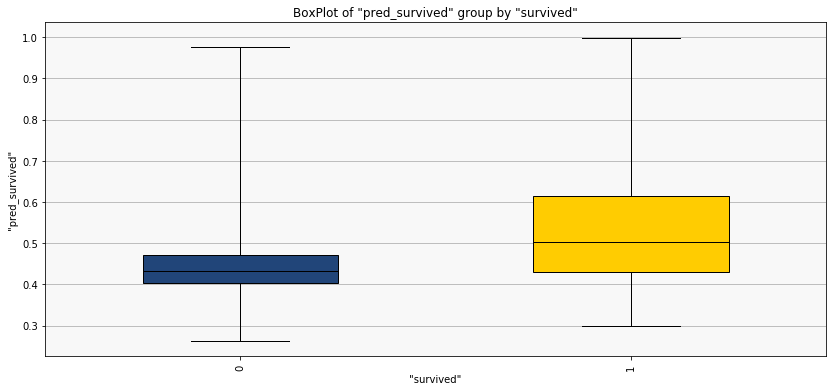

In [27]:
titanic["pred_survived"].boxplot(by = "survived")

Some Binary Classifiers have the possibility to evaluate the features importance.

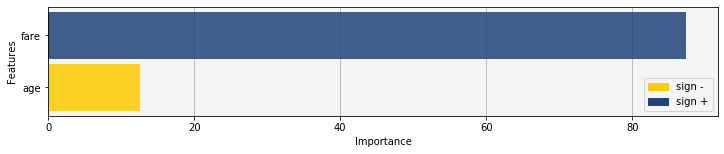

,importance
fare,87.36
age,12.64


<object>

In [29]:
model.features_importance()

Plot the model.

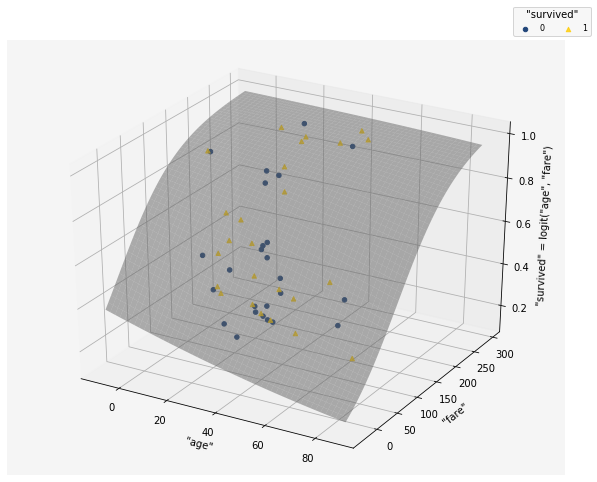

In [30]:
model.plot()